**Smart Inventory Optimization**

---



~By

Shreyas Bailkar - A101

Kunal Shenoy - A123

Amogh Bedekar - A130

In [104]:
import pandas as pd
import numpy as np
import pickle

In [105]:
df = pd.read_csv('Inventory_dataset (2).csv')

In [106]:
df.head(20)

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150.0,1575.0,5.0,180.0,175.0,low,none,Mumbai,4.5,250,increasing,A
1,SKU0002,5.25,300.0,1575.0,7.0,365.0,210.0,medium,seasonal,Banglore,4.0,350,stable,B
2,SKU0003,15.75,100.0,1575.0,3.0,90.0,90.0,high,none,Delhi,3.8,120,decreasing,C
3,SKU0004,8.00,200.0,1600.0,4.0,120.0,140.0,medium,none,Mumbai,4.7,180,increasing,A
4,SKU0005,3.00,500.0,1500.0,6.0,240.0,320.0,high,seasonal,Banglore,4.2,400,stable,B
5,SKU0006,20.00,75.0,1500.0,2.0,180.0,70.0,low,none,Delhi,3.5,80,decreasing,C
6,SKU0007,12.75,120.0,1530.0,5.0,365.0,125.0,medium,none,Mumbai,4.8,150,increasing,A
7,SKU0008,6.00,250.0,1500.0,7.0,120.0,180.0,medium,seasonal,Banglore,4.2,280,stable,B
8,SKU0009,18.50,90.0,1665.0,4.0,180.0,85.0,low,none,Delhi,3.9,110,decreasing,C
9,SKU0010,9.25,180.0,1665.0,3.0,365.0,200.0,high,none,Mumbai,4.6,220,increasing,A


In [107]:
df.describe()

,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Customer_Reviews
count,2131.000000,2073.000000,2100.000000,2116.000000,2131.000000,2080.000000,2097.000000
mean,15.345645,243.363242,3545.540033,4.083648,158.602065,155.157212,3.339342
std,15.037181,953.782330,19029.433500,3.320272,100.237995,443.418360,1.419077
min,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000
25%,7.500000,75.000000,1181.902500,2.000000,90.000000,70.000000,3.500000
50%,12.000000,110.000000,1420.500000,4.000000,180.000000,90.000000,3.900000
75%,18.725000,155.000000,2208.000000,5.000000,210.000000,135.000000,4.200000
max,200.000000,10000.000000,375000.000000,30.000000,365.000000,5000.000000,4.900000


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 2151 non-null   object 
 1   Item_Cost              2131 non-null   float64
 2   Item_Count             2073 non-null   float64
 3   Total_Cost             2100 non-null   float64
 4   Lead_Time              2116 non-null   float64
 5   Shelf_Life             2131 non-null   float64
 6   EOQ                    2080 non-null   float64
 7   Lead_Time_Variability  2130 non-null   object 
 8   Seasonality            2116 non-null   object 
 9   Warehouse_Location     2122 non-null   object 
 10  Customer_Reviews       2097 non-null   float64
 11  Historical_Sales_Data  2086 non-null   object 
 12  Demand_Fluctuation     2136 non-null   object 
 13  ABC_Classification     2116 non-null   object 
dtypes: float64(7), object(7)
memory usage: 235.4+ KB


In [109]:
df.isnull().sum()

SKU_ID                    0
Item_Cost                20
Item_Count               78
Total_Cost               51
Lead_Time                35
Shelf_Life               20
EOQ                      71
Lead_Time_Variability    21
Seasonality              35
Warehouse_Location       29
Customer_Reviews         54
Historical_Sales_Data    65
Demand_Fluctuation       15
ABC_Classification       35
dtype: int64

In [110]:
df.dropna(subset=['ABC_Classification'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2150
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 2116 non-null   object 
 1   Item_Cost              2096 non-null   float64
 2   Item_Count             2041 non-null   float64
 3   Total_Cost             2066 non-null   float64
 4   Lead_Time              2083 non-null   float64
 5   Shelf_Life             2097 non-null   float64
 6   EOQ                    2047 non-null   float64
 7   Lead_Time_Variability  2098 non-null   object 
 8   Seasonality            2085 non-null   object 
 9   Warehouse_Location     2089 non-null   object 
 10  Customer_Reviews       2063 non-null   float64
 11  Historical_Sales_Data  2072 non-null   object 
 12  Demand_Fluctuation     2104 non-null   object 
 13  ABC_Classification     2116 non-null   object 
dtypes: float64(7), object(7)
memory usage: 248.0+ KB


In [111]:
df.isnull().sum()

SKU_ID                    0
Item_Cost                20
Item_Count               75
Total_Cost               50
Lead_Time                33
Shelf_Life               19
EOQ                      69
Lead_Time_Variability    18
Seasonality              31
Warehouse_Location       27
Customer_Reviews         53
Historical_Sales_Data    44
Demand_Fluctuation       12
ABC_Classification        0
dtype: int64

In [112]:
# Replace null values with the most frequent value for each column
for column in df.columns:
    most_frequent = df[column].mode()[0]
    df[column].fillna(most_frequent, inplace=True)

df.isnull().sum()

SKU_ID                   0
Item_Cost                0
Item_Count               0
Total_Cost               0
Lead_Time                0
Shelf_Life               0
EOQ                      0
Lead_Time_Variability    0
Seasonality              0
Warehouse_Location       0
Customer_Reviews         0
Historical_Sales_Data    0
Demand_Fluctuation       0
ABC_Classification       0
dtype: int64

In [113]:
df.head(20)

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150.0,1575.0,5.0,180.0,175.0,low,none,Mumbai,4.5,250,increasing,A
1,SKU0002,5.25,300.0,1575.0,7.0,365.0,210.0,medium,seasonal,Banglore,4.0,350,stable,B
2,SKU0003,15.75,100.0,1575.0,3.0,90.0,90.0,high,none,Delhi,3.8,120,decreasing,C
3,SKU0004,8.00,200.0,1600.0,4.0,120.0,140.0,medium,none,Mumbai,4.7,180,increasing,A
4,SKU0005,3.00,500.0,1500.0,6.0,240.0,320.0,high,seasonal,Banglore,4.2,400,stable,B
5,SKU0006,20.00,75.0,1500.0,2.0,180.0,70.0,low,none,Delhi,3.5,80,decreasing,C
6,SKU0007,12.75,120.0,1530.0,5.0,365.0,125.0,medium,none,Mumbai,4.8,150,increasing,A
7,SKU0008,6.00,250.0,1500.0,7.0,120.0,180.0,medium,seasonal,Banglore,4.2,280,stable,B
8,SKU0009,18.50,90.0,1665.0,4.0,180.0,85.0,low,none,Delhi,3.9,110,decreasing,C
9,SKU0010,9.25,180.0,1665.0,3.0,365.0,200.0,high,none,Mumbai,4.6,220,increasing,A


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2116 entries, 0 to 2150
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   SKU_ID                 2116 non-null   object 
 1   Item_Cost              2116 non-null   float64
 2   Item_Count             2116 non-null   float64
 3   Total_Cost             2116 non-null   float64
 4   Lead_Time              2116 non-null   float64
 5   Shelf_Life             2116 non-null   float64
 6   EOQ                    2116 non-null   float64
 7   Lead_Time_Variability  2116 non-null   object 
 8   Seasonality            2116 non-null   object 
 9   Warehouse_Location     2116 non-null   object 
 10  Customer_Reviews       2116 non-null   float64
 11  Historical_Sales_Data  2116 non-null   object 
 12  Demand_Fluctuation     2116 non-null   object 
 13  ABC_Classification     2116 non-null   object 
dtypes: float64(7), object(7)
memory usage: 248.0+ KB


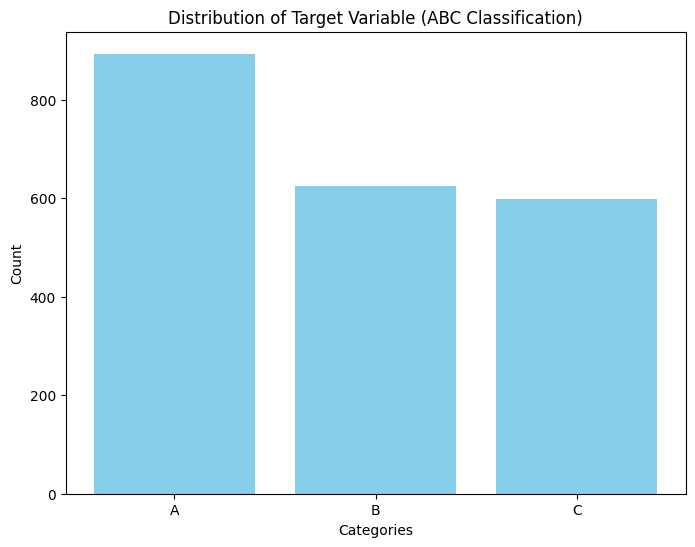

In [115]:
import matplotlib.pyplot as plt

target_counts = df['ABC_Classification'].value_counts()

# Extract the unique values (categories) and their counts
categories = target_counts.index
counts = target_counts.values

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Distribution of Target Variable (ABC Classification)')
plt.xticks(rotation=0)

# Show the plot
plt.show()


In [116]:
df['ABC_Classification'].value_counts()

ABC_Classification
A    893
B    625
C    598
Name: count, dtype: int64

In [117]:
df.nunique()

SKU_ID                   2115
Item_Cost                 493
Item_Count                134
Total_Cost               1015
Lead_Time                  13
Shelf_Life                 18
EOQ                       143
Lead_Time_Variability       3
Seasonality                 2
Warehouse_Location          9
Customer_Reviews           50
Historical_Sales_Data     157
Demand_Fluctuation          3
ABC_Classification          3
dtype: int64

In [118]:
df['Warehouse_Location'].value_counts()

Warehouse_Location
Mumbai       573
Delhi        452
Banglore     427
Pune         324
Chennai      122
Kolkata      103
Lucknow       45
Gujarat       37
Hyderabad     33
Name: count, dtype: int64

In [119]:
from sklearn.preprocessing import OrdinalEncoder

le = OrdinalEncoder()

In [120]:
# df['ABC_Classification'] = le.fit_transform(df[['ABC_Classification']])
df['Seasonality'] = le.fit_transform(df[['Seasonality']])
df['Lead_Time_Variability'] = le.fit_transform(df[['Lead_Time_Variability']])
df['Warehouse_Location'] = le.fit_transform(df[['Warehouse_Location']])
df['Demand_Fluctuation'] = le.fit_transform(df[['Demand_Fluctuation']])
df['Historical_Sales_Data'] = le.fit_transform(df[['Historical_Sales_Data']])

df.head(20)

,SKU_ID,Item_Cost,Item_Count,Total_Cost,Lead_Time,Shelf_Life,EOQ,Lead_Time_Variability,Seasonality,Warehouse_Location,Customer_Reviews,Historical_Sales_Data,Demand_Fluctuation,ABC_Classification
0,SKU0001,10.50,150.0,1575.0,5.0,180.0,175.0,1.0,0.0,7.0,4.5,66.0,1.0,A
1,SKU0002,5.25,300.0,1575.0,7.0,365.0,210.0,2.0,1.0,0.0,4.0,87.0,2.0,B
2,SKU0003,15.75,100.0,1575.0,3.0,90.0,90.0,0.0,0.0,2.0,3.8,14.0,0.0,C
3,SKU0004,8.00,200.0,1600.0,4.0,120.0,140.0,2.0,0.0,7.0,4.7,44.0,1.0,A
4,SKU0005,3.00,500.0,1500.0,6.0,240.0,320.0,0.0,1.0,0.0,4.2,98.0,2.0,B
5,SKU0006,20.00,75.0,1500.0,2.0,180.0,70.0,1.0,0.0,2.0,3.5,142.0,0.0,C
6,SKU0007,12.75,120.0,1530.0,5.0,365.0,125.0,2.0,0.0,7.0,4.8,32.0,1.0,A
7,SKU0008,6.00,250.0,1500.0,7.0,120.0,180.0,2.0,1.0,0.0,4.2,72.0,2.0,B
8,SKU0009,18.50,90.0,1665.0,4.0,180.0,85.0,1.0,0.0,2.0,3.9,9.0,0.0,C
9,SKU0010,9.25,180.0,1665.0,3.0,365.0,200.0,0.0,0.0,7.0,4.6,59.0,1.0,A


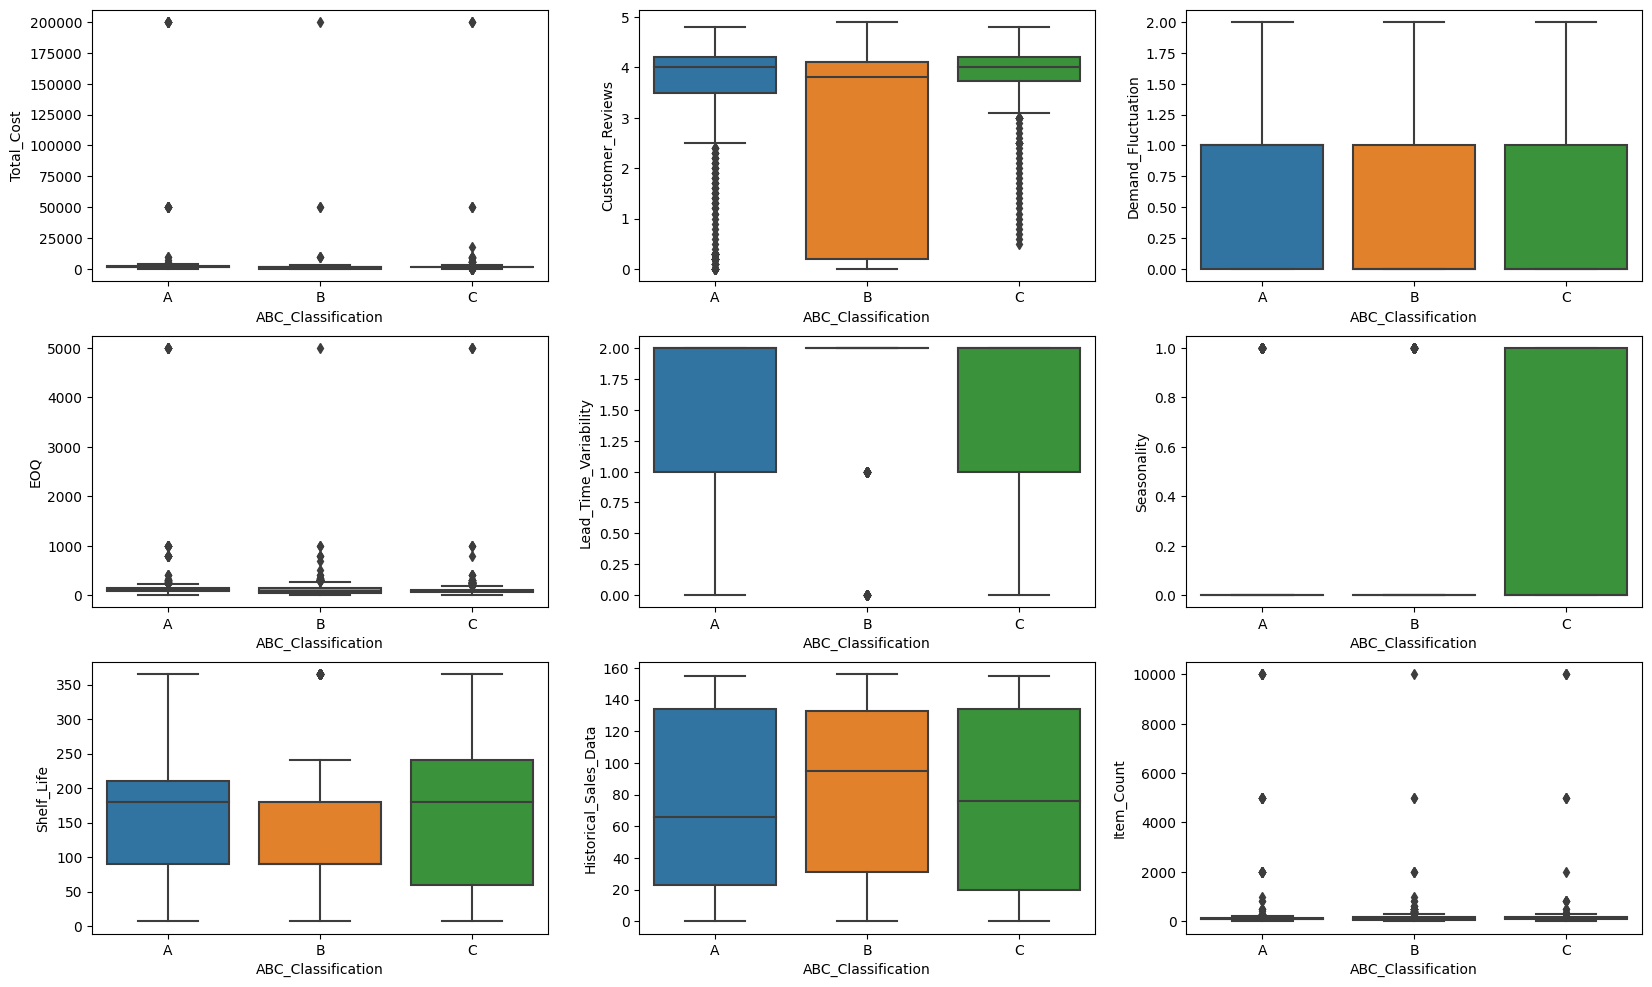

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.boxplot(x=df['ABC_Classification'],y=df['Total_Cost'])
plt.subplot(3,3,2)
sns.boxplot(x=df['ABC_Classification'],y=df['Customer_Reviews'])
plt.subplot(3,3,3)
sns.boxplot(x=df['ABC_Classification'],y=df['Demand_Fluctuation'])
plt.subplot(3,3,4)
sns.boxplot(x=df['ABC_Classification'],y=df['EOQ'])
plt.subplot(3,3,5)
sns.boxplot(x=df['ABC_Classification'],y=df['Lead_Time_Variability'])
plt.subplot(3,3,6)
sns.boxplot(x=df['ABC_Classification'],y=df['Seasonality'])
plt.subplot(3,3,7)
sns.boxplot(x=df['ABC_Classification'],y=df['Shelf_Life'])
plt.subplot(3,3,8)
sns.boxplot(x=df['ABC_Classification'],y=df['Historical_Sales_Data'])
plt.subplot(3,3,9)
sns.boxplot(x=df['ABC_Classification'],y=df['Item_Count'])

plt.show()


In [122]:
df = df[(df['Total_Cost'] <= 60000) & (df['Historical_Sales_Data'] <= 1500) & (df['EOQ'] <= 1500) & (df['Item_Count'] <= 3000)]

df.shape

(2088, 14)

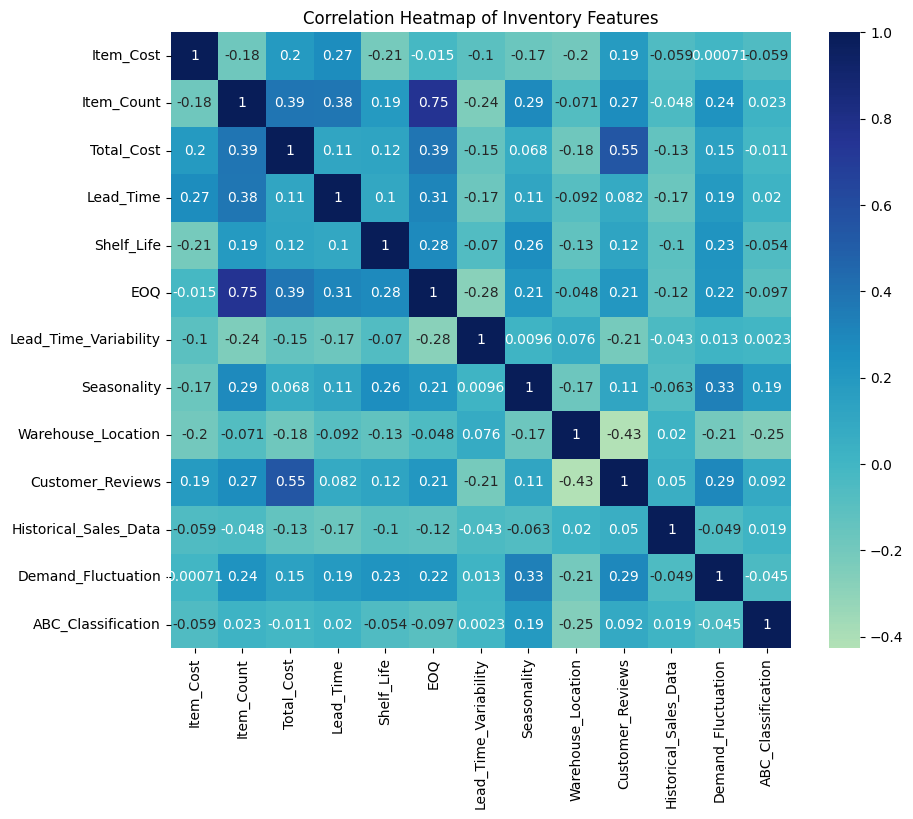

In [123]:
plt.figure(figsize=(10, 8))

d = df.drop(columns='SKU_ID')

d['ABC_Classification'] = le.fit_transform(d[['ABC_Classification']])
corr_matrix = d.corr()
sns.heatmap(corr_matrix, cmap='YlGnBu', annot=True, center=0)
plt.title('Correlation Heatmap of Inventory Features')
plt.show()

In [124]:
from sklearn.model_selection import train_test_split

X = df.drop(['ABC_Classification','SKU_ID'],axis=1)
y = df['ABC_Classification']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=417)

In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [126]:
y_pred = model.predict(X_test)

In [127]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       0.89      0.87      0.88       215
           B       0.90      0.83      0.86       164
           C       0.73      0.83      0.78       143

    accuracy                           0.84       522
   macro avg       0.84      0.84      0.84       522
weighted avg       0.85      0.84      0.85       522



In [128]:
print(confusion_matrix(y_test,y_pred))

[[186   6  23]
 [  8 136  20]
 [ 15   9 119]]


In [129]:
print('Accuracy :',np.round(accuracy_score(y_test,y_pred),decimals=4)*100,'%')

Accuracy : 84.48 %


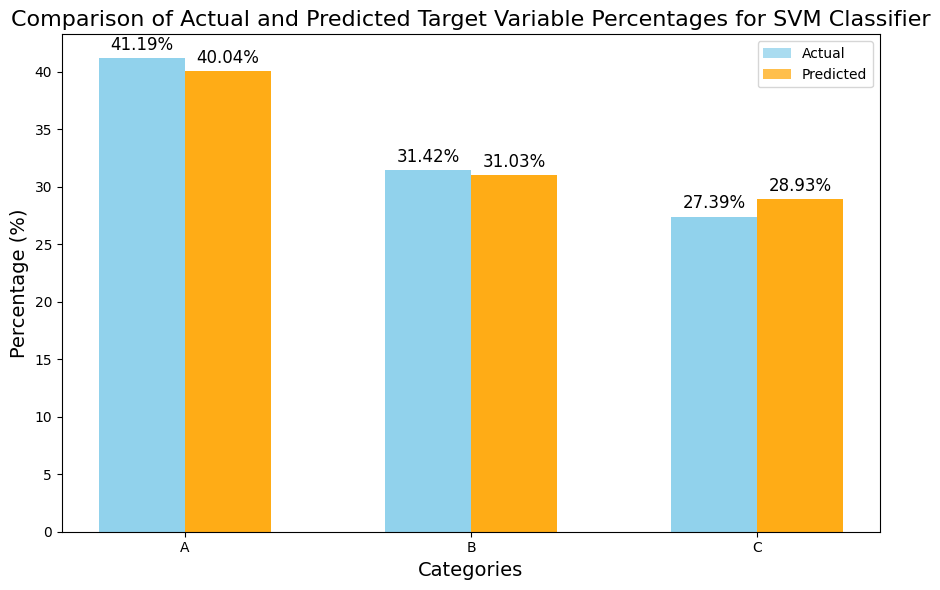

In [130]:
total_entries = len(y_test)
actual_percentages = (y_test.value_counts() / total_entries) * 100
predicted_percentages = (pd.Series(y_pred).value_counts() / total_entries) * 100

# Extract the unique values (categories) and their percentages
categories = actual_percentages.index

# Create a bar graph to compare actual and predicted percentages
plt.figure(figsize=(9, 6))
bar_width = 0.30
index = range(len(categories))

plt.bar(index, actual_percentages, bar_width, label='Actual', color='skyblue', alpha=0.7)
plt.bar([i + bar_width for i in index], predicted_percentages, bar_width, label='Predicted', color='orange', alpha=0.7)

plt.xlabel('Categories',fontsize=14)
plt.ylabel('Percentage (%)',fontsize=14)
plt.title('Comparison of Actual and Predicted Target Variable Percentages for SVM Classifier',fontsize=16)
plt.xticks([i + bar_width / 2 for i in index], categories, rotation=0)
plt.legend()

# Add percentage labels on top of the bars
for bar, percentage in zip(plt.bar(index, actual_percentages, bar_width, label='Actual', color='skyblue', alpha=0.7), actual_percentages):
    height = bar.get_height()
    plt.annotate(f'{percentage:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12)

for bar, percentage in zip(plt.bar([i + bar_width for i in index], predicted_percentages, bar_width, label='Predicted', color='orange', alpha=0.7), predicted_percentages):
    height = bar.get_height()
    plt.annotate(f'{percentage:.2f}%',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom',
                 fontsize=12)

plt.tight_layout()

# Show the plot
plt.show()

In [131]:
with open('model.pkl','wb') as files:
    pickle.dump(model,files)